In [1]:
import json
#import sys
import os
#import pymatgen
from pymatgen.core import Structure #, Molecule, Lattice
from matminer.featurizers.site import CrystalNNFingerprint
from matminer.featurizers.structure import SiteStatsFingerprint
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#import chemparse
import glob
import pickle
#### Self defined class
os.chdir('C:/Users/Anupam/Desktop/MP_flatband/flatness_code/')
from flatband_materials_from_MP import flatband_materials_from_MP

C:\Users\Anupam\anaconda3\envs\MP_flatband_win\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [11]:
#%%  Read flatness flatness prediction
list_prediction_files = glob.glob('4_predict/list_predicted_materials_*')
starts=[]
ends=[]
for items in list_prediction_files:
    starts.append(int(items.split('_')[-2]))
    ends.append(int(items.split('_')[-1]))
starts.sort()
ends.sort()

flat_score=[]
all_ids=[]
binary_flat=[]
flat_segs=[]
for i in range(0,len(starts)):   # from 1 to rest
    first_id=starts[i]
    last_id= ends[i]
    with open('4_predict/list_predicted_materials_'+str(first_id)+'_'+str(last_id),'rb') as op:
        Mat_flat= pickle.load(op)
        for items in Mat_flat:
            all_ids.append(items.material_id)
            predicted = items.prediction_vector
            binary_flat.append(items.flatness)
            flat_segs.append(items.flat_segments)
            rblock = items.num_energy_seg
            cblock = items.num_kpath_seg
            pred_2d=np.reshape(predicted,(rblock,cblock))
            FL=np.average(pred_2d,axis=1)
            #print(FL)
            flat_score.append(max(FL))
    #print('Mat_flat reading done')
    #get_fingerprint(path, first_id, last_id,Mat_flat)

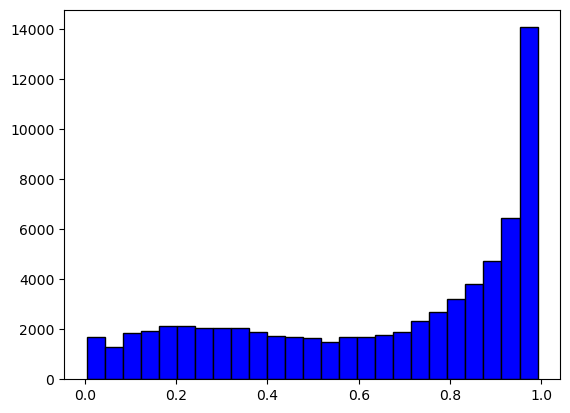

In [12]:
plt.hist(flat_score, bins=25,color= 'blue', ec = 'black')
zipped = list(zip(all_ids,flat_score, binary_flat,flat_segs))
df = pd.DataFrame(zipped, columns=['MP-ID', 'Comp Flatness score','Flat/not-flat', 'Flat segments'])
df.to_csv('Compound_flatness_score.dat', sep='\t')